In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [4]:
# Show a sample of data to see what we have to work with
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
3717,3718,15623536,Madukwe,646,Germany,Male,39,0,154439.86,1,1,0,171519.06,0,0,4,GOLD,422
6364,6365,15663421,Esposito,527,Spain,Male,28,6,128396.33,2,1,0,79919.97,0,0,5,SILVER,882
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0,0,5,DIAMOND,651
9810,9811,15705994,Udinese,712,Spain,Male,27,10,0.00,1,1,0,94544.88,0,0,3,GOLD,410
6191,6192,15747000,Shih,592,France,Male,27,3,0.00,2,1,1,19645.65,0,0,5,PLATINUM,434


In [7]:
# drops CID and removes the column and inplace = True, makes the changes directly to the original DataFrame 
df.drop('CustomerId', axis = 'columns', inplace = True) 

In [13]:
df.shape

(10000, 17)

In [11]:
# fix data types from object to relevant type
# if needed which is not needed here for this dataset
# pd.to_numeric(df.something, errors = 'coerce').isnull()
df.dtypes

RowNumber               int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [12]:
# Theres are no null or empty calues in our df if there was any we could drop it using something like the following command
df1 = df[df.CreditScore!=' ']
df1.shape

(10000, 17)

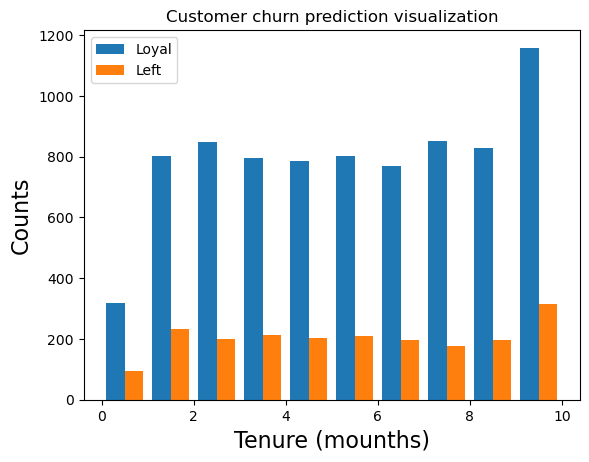

In [34]:
# let's visualize the data to see what we can figure out, let's use Tenure
# let's draw the histogram to find who is not leaving and is loyal
tenure_churn_loyal = df1[df1.Exited == 0].Tenure # tenure of loyal customers
tenure_churn_left = df1[df1.Exited == 1].Tenure # tenure of the ones leaving

ax = plt.hist([tenure_churn_loyal, tenure_churn_left], label =['Loyal', 'Left'] )

plt.xlabel("Tenure (mounths)", fontsize=16)  
plt.ylabel("Counts", fontsize=16)
plt.title("Customer churn prediction visualization")
plt.legend();

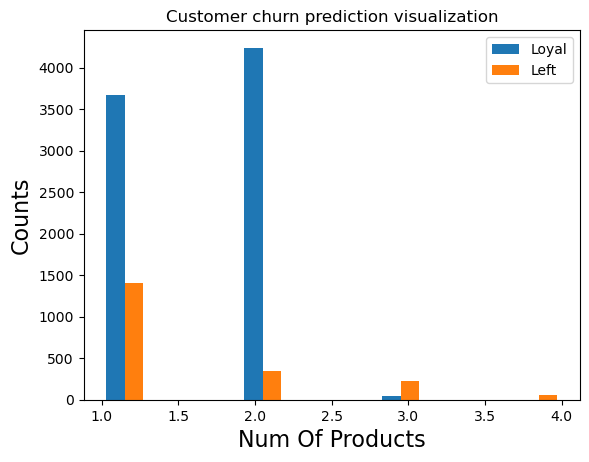

In [35]:
nop_churn_loyal = df1[df1.Exited == 0].NumOfProducts # tenure of loyal customers
nop_churn_left = df1[df1.Exited == 1].NumOfProducts # tenure of the ones leaving

ax = plt.hist([nop_churn_loyal, nop_churn_left], label =['Loyal', 'Left'] )

plt.xlabel("Num Of Products", fontsize=16)  
plt.ylabel("Counts", fontsize=16)
plt.title("Customer churn prediction visualization")
plt.legend();

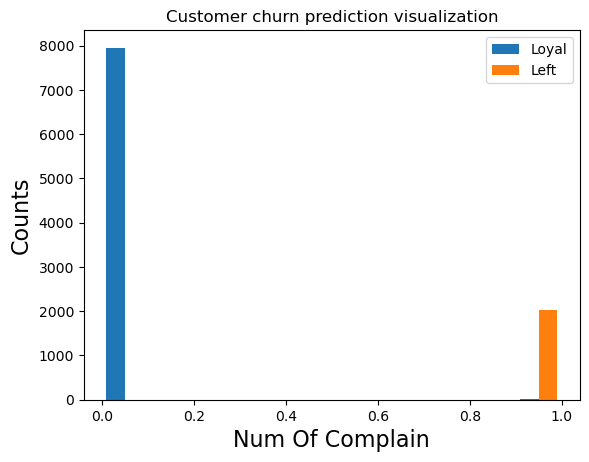

In [36]:
comp_churn_loyal = df1[df1.Exited == 0].Complain # tenure of loyal customers
comp_churn_left = df1[df1.Exited == 1].Complain # tenure of the ones leaving

ax = plt.hist([comp_churn_loyal, comp_churn_left], label =['Loyal', 'Left'] )

plt.xlabel("Num Of Complain", fontsize=16)  
plt.ylabel("Counts", fontsize=16)
plt.title("Customer churn prediction visualization")
plt.legend();

you can check unique values using following  
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

In [39]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [41]:
df1.Gender.unique()

array([1, 0], dtype=int64)

In [42]:
# tranform the data with different variable in each col to muliple col with value 0 and 1 for example here we get one col for Gold card memebrs with value 0 for every other card and so on.
df2 = pd.get_dummies(data=df1, columns=['Card Type','Geography'])
df2.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Card Type_DIAMOND', 'Card Type_GOLD',
       'Card Type_PLATINUM', 'Card Type_SILVER', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [43]:
df2.sample(5)

,RowNumber,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
9564,9565,Fiorentino,554,0,42,1,0.00,2,0,1,...,0,2,593,0,1,0,0,0,0,1
6133,6134,Chiganu,667,1,33,4,127076.68,2,1,0,...,0,5,910,0,0,1,0,0,1,0
7845,7846,Kao,648,0,34,0,0.00,1,1,1,...,0,1,445,0,0,1,0,1,0,0
5694,5695,Donaldson,660,1,31,6,172325.67,1,0,1,...,0,4,223,0,0,1,0,1,0,0
1540,1541,Onwuamaeze,530,0,23,1,137060.88,2,1,1,...,0,2,284,0,1,0,0,0,1,0


In [49]:
# Scale the data to numbers between zero and 1 so we have normalized values to work with in our model. 
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts','Satisfaction Score','Point Earned']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [47]:
# Surname is not a defigning feature in predicting loyalty so we drop it out
df2.drop('Surname',axis='columns',inplace=True)

In [50]:
# Show unique values and make sure they are zero to one
for col in df2:
    print(f'{col}: {df2[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536

In [51]:
df2.sample(5)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Complain,Satisfaction Score,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain
4319,4320,0.518,0,0.216216,0.7,0.560765,0.333333,1,0,0.231297,...,0,0.50,0.688990,1,0,0,0,0,0,1
9444,9445,0.462,0,0.310811,0.2,0.509823,0.333333,1,1,0.220993,...,0,0.25,0.435868,0,0,0,1,0,1,0
9468,9469,0.526,1,0.364865,0.9,0.569017,0.333333,1,0,0.173707,...,0,0.50,0.599319,0,0,0,1,0,1,0
4088,4089,0.810,0,0.297297,0.2,0.547756,0.333333,0,0,0.883869,...,0,0.00,0.317821,0,0,0,1,0,1,0
2763,2764,0.712,1,0.391892,0.6,0.480760,0.000000,1,1,0.704028,...,0,1.00,0.852440,1,0,0,0,0,1,0


In [52]:
# Train test split
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [53]:
X_train.shape

(8000, 20)

In [54]:
# we need number of columns to be used for the model here it's 20
X_test.shape # len(X_train.columns)

(2000, 20)

# Build a model (ANN) in tensorflow/keras
three layers with 20, 15 and 1 units (or think neurons) in each. The activation function used here is Rectified Linear Unit (ReLU). This model is a feedforward neural network with one input layer, two hidden layers with ReLU activation, and an output layer with a sigmoid activation function which is suitable for a binary classification task.

In [58]:
# Evaluate the model on test data
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 910us/step - loss: 0.0106 - accuracy: 0.9990


[0.010599978268146515, 0.9990000128746033]

In [59]:
# Show predicted y 
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 859us/step


array([[0.00031399],
       [0.00229247],
       [0.00033348],
       [0.0004809 ],
       [0.00063132]], dtype=float32)

In [65]:
# transform predicted y to 1 dimension and convert values to 0 and 1 
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [62]:
# now if we look at test data we see how good the prediction above is
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1595
           1       1.00      1.00      1.00       405

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(95.72222222222221, 0.5, 'Truth')

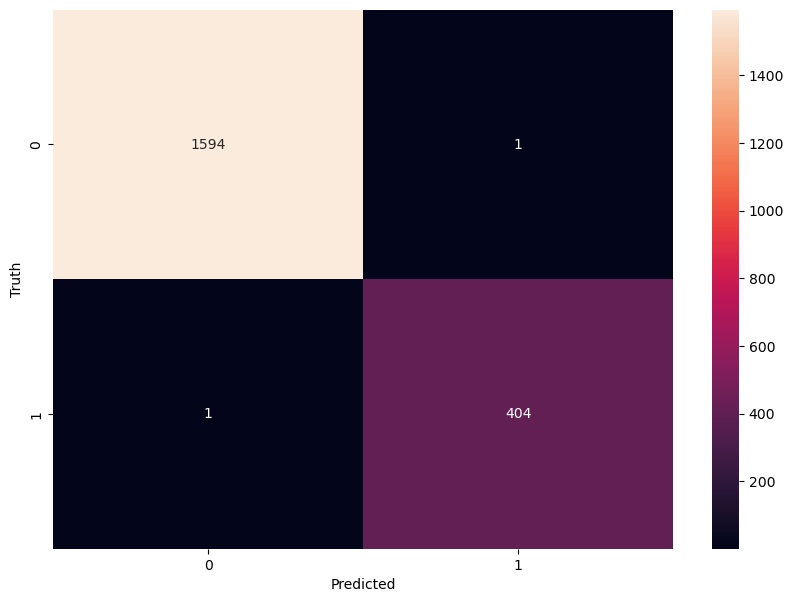

In [64]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# explaination of the confusion matrix above
404 times the model predicted 1 correctly and 1594 times it predicted 0 correctly which means it can tell if the client is leaving or staying. The rong predictions are 1 for both loyal and exiting customers. if you want to see the accuracy you can use the following:

In [66]:
# accuracy
round((404+1594)/(404+1594+1+1),2)

1.0

In [67]:
# Precision for 0 class. i.e. Precision for customers who did not churn
round(1594/(1594+1),2)

1.0

In [68]:
# Recall for 0 class 
round(1594/(1594+1),2)


1.0

In [69]:
# Recall for 1 class 
round(404/(404+1),2)

1.0